# Marketing Analysis: Exploratory Data Analysis

**Summary**
- Imports
- First Impression
- Preprocessing
    - Rename column names
    - Reorder columns
    - Correct Datatypes
    - Remove NaN values
- Exploratory Data Analyisis

## Imports & Settings

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from datetime import datetime
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [2]:
from matplotlib.colors import ListedColormap

# Setting up color palette for easier use later
sns.set_palette("Set2")
cmap = ListedColormap(sns.color_palette("Set2")) # set cmap as 'Set2'

# Create individual colors
pal = sns.color_palette("Set2") # Use of Seaborn 'Set2' palette
color_list = pal.as_hex() # Save list as hexcodes

# Assign color to variable
set2_green = color_list[0]
set2_orange = color_list[1]
set2_blue = color_list[2]
set2_rose = color_list[3]
set2_green2 = color_list[4]
set2_yellow = color_list[5]
set2_beige = color_list[6]
set2_grey = color_list[7]

color_list

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']

## First impression

In [3]:
data = pd.read_csv("data/marketing_data.csv")

In [4]:
data.head(5)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_1,accepted_cmp_2,response,complain,country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2240 non-null   int64 
 1   year_birth             2240 non-null   int64 
 2   education              2240 non-null   object
 3   marital_status         2240 non-null   object
 4    income                2216 non-null   object
 5   kidhome                2240 non-null   int64 
 6   teenhome               2240 non-null   int64 
 7   dt_customer            2240 non-null   object
 8   recency                2240 non-null   int64 
 9   mnt_wines              2240 non-null   int64 
 10  mnt_fruits             2240 non-null   int64 
 11  mnt_meat_products      2240 non-null   int64 
 12  mnt_fish_products      2240 non-null   int64 
 13  mnt_sweet_products     2240 non-null   int64 
 14  mnt_gold_prods         2240 non-null   int64 
 15  num_deals_purchases  

## Preprocessing

### Removing Whitespace

The `Income` column, has unnecessary whitespace before the name. The first step entails removing all whitespace in the column names.

In [6]:
data.columns = data.columns.str.replace(' ', '')

In [7]:
data.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_1,accepted_cmp_2,response,complain,country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA


### Correct datatypes (dtypes) of columns

In [8]:
data.dtypes # dtype overview

id                        int64
year_birth                int64
education                object
marital_status           object
income                   object
kidhome                   int64
teenhome                  int64
dt_customer              object
recency                   int64
mnt_wines                 int64
mnt_fruits                int64
mnt_meat_products         int64
mnt_fish_products         int64
mnt_sweet_products        int64
mnt_gold_prods            int64
num_deals_purchases       int64
num_web_purchases         int64
num_catalog_purchases     int64
num_store_purchases       int64
num_web_visits_month      int64
accepted_cmp_3            int64
accepted_cmp_4            int64
accepted_cmp_5            int64
accepted_cmp_1            int64
accepted_cmp_2            int64
response                  int64
complain                  int64
country                  object
dtype: object

In [9]:
data.dt_customer = pd.to_datetime(data.dt_customer) # Change to datetime in `dt_customer`
data.income = pd.to_numeric(data.income.replace('[^0-9\.-]', '', regex=True)) # Change `income` from currency based string dtype to float


### Remove NaN values

Let's check the dataset for any missing (NaN) values. As you can see below, theere are only some missing values in the `income` column.

<AxesSubplot:>

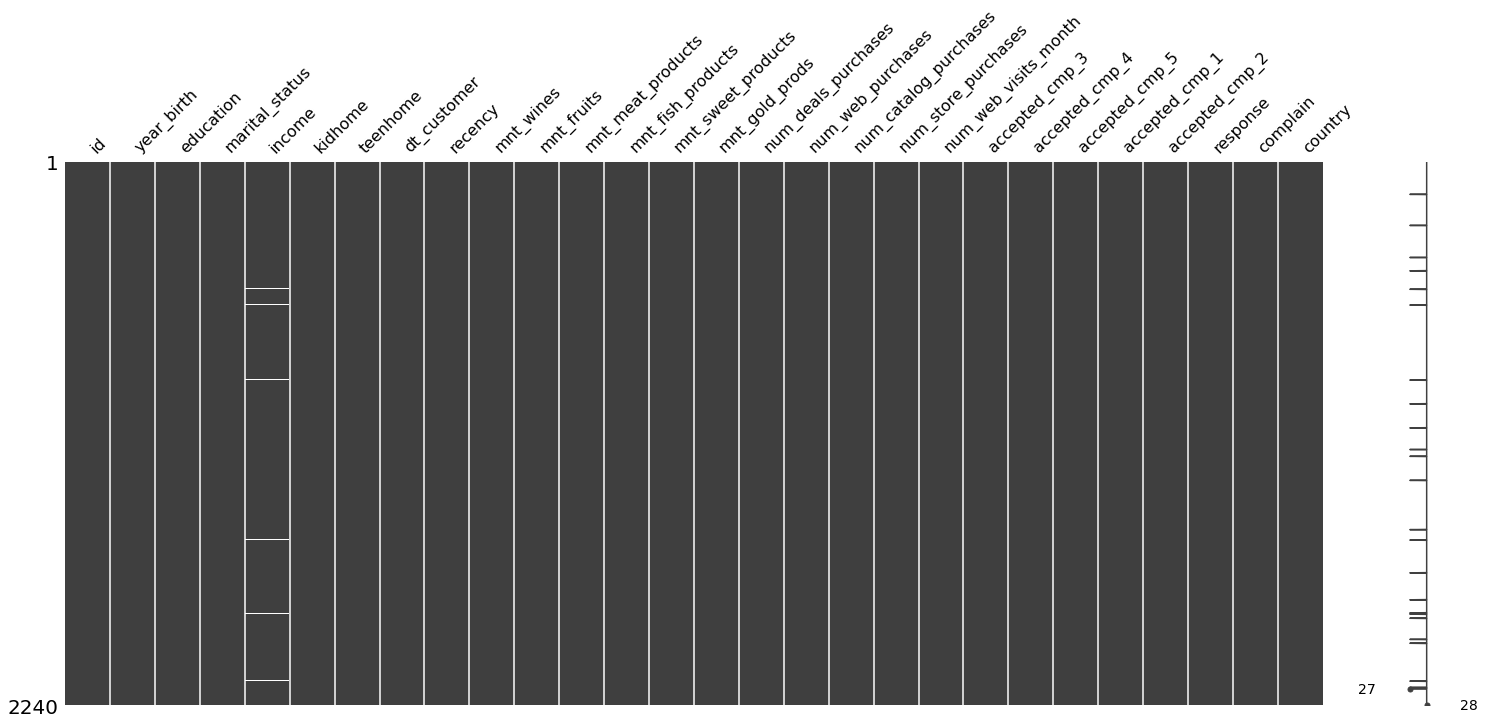

In [10]:
msno.matrix(data)

In [11]:
# Making sure that the 'income' column has no outliers and mean is an effective way to replace NaN values.
display(data.income.describe())

# Fill NaN with mean
data.income.fillna(data.income.mean(),inplace=True)

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64

### Remove outliers

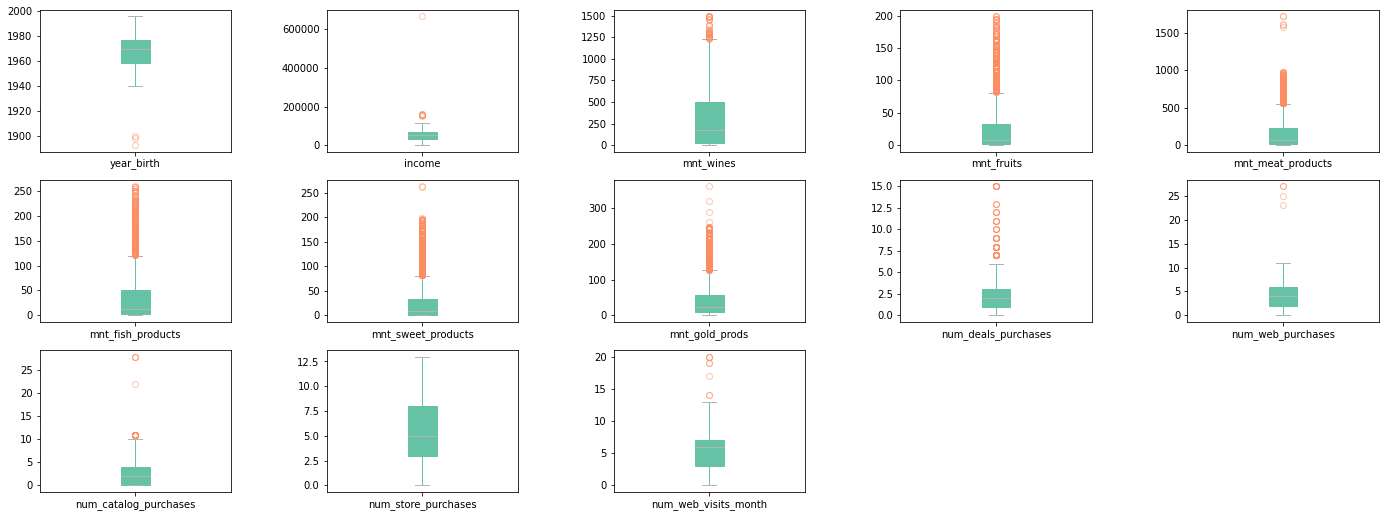

In [12]:
# Create list of columns
mask_subset = ['year_birth', 'income', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month']

# Plot list of columns on boxplots to find outliers
data[mask_subset].plot(cmap=cmap, flierprops=dict(c=set2_orange, markeredgecolor=set2_orange, alpha=.5), capprops=dict(c=set2_grey),
       subplots=True, layout=(4,5), kind='box', figsize=(24,12), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

It is visible that there is a couple of outliers in these fields:
- `income` has one large outlier
- `year_birth` has multiple people born before 1900 which seems unlikely

In [13]:
mask = {
    'income': [data.income.mean(), data.income.median()],
    'year_birth': [data.year_birth.mean(), data.year_birth.median()],
}
index_labels=['mean','median']

df_median_mean_mode = pd.DataFrame(data=mask,index=index_labels)
df_median_mean_mode

,income,year_birth
mean,52247.251354,1968.805804
median,51741.500000,1970.000000


In [14]:
# Calculate median income and date of birth
mean_income = data.income.mean() # Calculate mean income
median_year_birth = data.year_birth.median() # Calculate the median age

# Apply lambda function to impute outliers with mean and median
data.income = data.income.apply(lambda x: mean_income if x>300000 else x)
data.year_birth = data.year_birth.apply(lambda x: median_year_birth if x>=2004 or x<=1930 else x)

### Add new columns

There are columns in this dataset that either need updating or can be added for more information.

To be updated:
- `country_code`
- `country`

To be created new:
- `age`
- `minors`
- `mnt_total`
- `purchases`
- `income class`

In [15]:
# Update country columns for better visualization
data["country_code"] = data.country

# replace codes with full names
data.country = data.country.replace({
    'SP':'Spain', 'SA':'South Africa', 'CA':'Canada', 'AUS':'Australia',
    'IND':'India', 'GER':'Germany', 'US':'USA','ME':'Montenegro'
    })

# change country codes to offical form
data.country_code = data.country_code.replace({
    'SP': 'ESP', 'SA': 'ZAF', 'CA':'CAN', 'GER':'DEU', 'ME':'MEN', 'US':'USA',
    })

In [16]:
# Add age column. Reversed-engineered from `year_birth` column
data["age"] = data.year_birth.apply(lambda x: datetime.now().year - x)

# Add `minors` column which is the total of kids and teens in a home
data['minors_home'] = data.kidhome + data.teenhome

# Add `mnt_total` column which is the total consumption of all goods
mnt_columns = [column for column in data.columns if 'mnt' in column]
data['mnt_total'] =  data[mnt_columns].sum(axis=1)

# Add `purchases` column which is the total purchases
purchases_columns = [column for column in data.columns if 'purchases' in column]
data['purchases_total'] = data[purchases_columns].sum(axis=1)

# Total Campaigns Accepted
campaigns_column = [column for column in data.columns if 'cmp' in column] + ['response']
data['accepted_cmp_total'] = data[campaigns_column].sum(axis=1)

# Create income categories
data["income_class"] = data.income.copy()
for x in data.income_class:
    if x <= 32000:
        data.income_class.replace(x, "lower class",inplace=True)
    elif 32000 < x <= 52000:
        data.income_class.replace(x, "lower-middle class",inplace=True)
    elif 52000 < x <= 106000:
        data.income_class.replace(x, "middle class",inplace=True)
    elif 106000 < x <= 373000:
        data.income_class.replace(x, "upper-middle class",inplace=True)
    elif x > 373000:
        data.income_class.replace(x, "rich",inplace=True)              

In [17]:
data.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_1,accepted_cmp_2,response,complain,country,country_code,age,minors_home,mnt_total,purchases_total,accepted_cmp_total,income_class
0,1826,1970.0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,Spain,ESP,52.0,0,1190,15,1,middle class
1,1,1961.0,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,Canada,CAN,61.0,0,577,18,2,middle class
2,10476,1958.0,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,USA,USA,64.0,1,251,11,0,middle class
3,1386,1967.0,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,Australia,AUS,55.0,2,11,4,0,lower-middle class
4,5371,1989.0,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,Spain,ESP,33.0,1,91,8,2,lower class


In [18]:
data.income_class.value_counts()

middle class          1107
lower-middle class     682
lower class            443
upper-middle class       8
Name: income_class, dtype: int64

### Change education values

The `education` column has very unique and confusing values. It is not clear what the values mean. Let's analyze it.

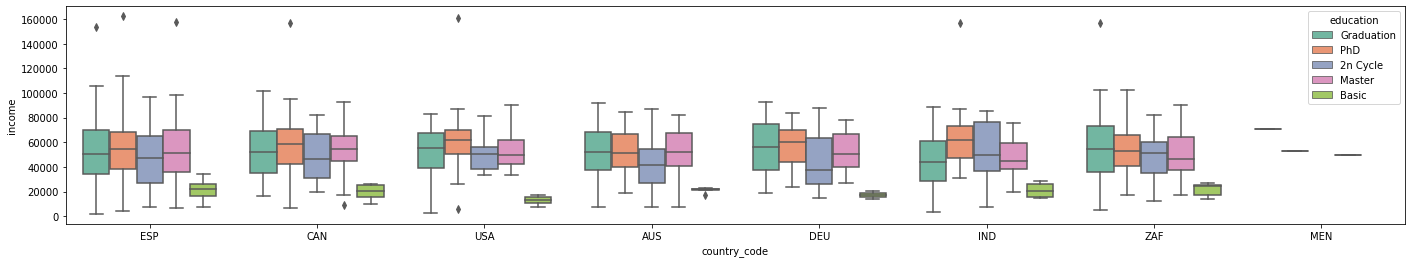

In [19]:
plt.figure(figsize=(24,4))
sns.boxplot(data=data,x="country_code", y="income", hue="education")
plt.show()

As suspected, there is an anomaly looking at basic level education and income. "Basic" seems to be a mere High School degree while 2n Cycle and Master is the same degree as Master. (click [here](https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/) for reference)

That means that:
- '2n Cycle' and 'Master' can be merged,
- 'Graduation' equals Bachelors degree,
- 'Basic' is a high school diploma.

this column is so uncertain and the spred in `income` is too inconsistent to create a clear rule to rename the features. Therefore, this feature should be interpreted with care.

In [20]:
data.education.replace("2n Cycle", "Master", inplace=True)

### Change marital status data entries

In [21]:
data.marital_status.value_counts().sort_values(ascending=False)

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: marital_status, dtype: int64

<AxesSubplot:xlabel='marital_status', ylabel='count'>

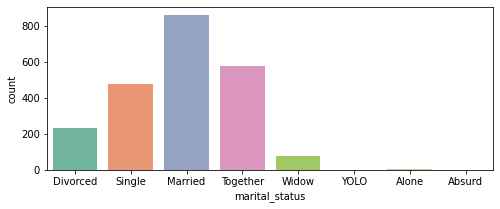

In [22]:
plt.figure(figsize=(8,3))
sns.countplot(data=data, x="marital_status")

As you can see, most of these values are non-standartized. Let's put some of them together.

In [23]:
data.marital_status = data.marital_status.replace({
    'Alone': 'Single', 'Widow': 'Widowed', 'YOLO': 'Single', 'Absurd':'Single', 'Together': 'Cohabitation'
    })

In [24]:
data.marital_status.value_counts()

Married         864
Cohabitation    580
Single          487
Divorced        232
Widowed          77
Name: marital_status, dtype: int64

### Reorder columns

In [25]:
# The order of the columns is non-sequential. Campaign 3 comes before Campaign 1. Let's reorder the columns.
order = [
    'id',
    'year_birth',
    'age',
    'education',
    'marital_status',
    'income',
    'income_class',
    'kidhome',
    'teenhome',
    'minors_home',
    'dt_customer',
    'recency',
    'mnt_wines',
    'mnt_fruits',
    'mnt_meat_products',
    'mnt_fish_products',
    'mnt_sweet_products',
    'mnt_gold_prods',
    'mnt_total',
    'num_deals_purchases',
    'num_web_purchases',
    'num_catalog_purchases',
    'num_store_purchases',
    'purchases_total',
    'num_web_visits_month',
    'accepted_cmp_1',
    'accepted_cmp_2',
    'accepted_cmp_3',
    'accepted_cmp_4',
    'accepted_cmp_5',
    'accepted_cmp_total',
    'response',
    'complain',
    'country',
    'country_code',
]
data = data[order]

In [26]:
data.head()

,id,year_birth,age,education,marital_status,income,income_class,kidhome,teenhome,minors_home,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,mnt_total,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,purchases_total,num_web_visits_month,accepted_cmp_1,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_total,response,complain,country,country_code
0,1826,1970.0,52.0,Graduation,Divorced,84835.0,middle class,0,0,0,2014-06-16,0,189,104,379,111,189,218,1190,1,4,4,6,15,1,0,0,0,0,0,1,1,0,Spain,ESP
1,1,1961.0,61.0,Graduation,Single,57091.0,middle class,0,0,0,2014-06-15,0,464,5,64,7,0,37,577,1,7,3,7,18,5,0,1,0,0,0,2,1,0,Canada,CAN
2,10476,1958.0,64.0,Graduation,Married,67267.0,middle class,0,1,1,2014-05-13,0,134,11,59,15,2,30,251,1,3,2,5,11,2,0,0,0,0,0,0,0,0,USA,USA
3,1386,1967.0,55.0,Graduation,Cohabitation,32474.0,lower-middle class,1,1,2,2014-05-11,0,10,0,1,0,0,0,11,1,1,0,2,4,7,0,0,0,0,0,0,0,0,Australia,AUS
4,5371,1989.0,33.0,Graduation,Single,21474.0,lower class,1,0,1,2014-04-08,0,6,16,24,11,0,34,91,2,3,1,2,8,7,0,0,1,0,0,2,1,0,Spain,ESP


The dataset is now wrangeled and preprocessed. For convenience the clean dataset shall be renamed `df`.

In [27]:
df = data

## Exploratory Data Analysis

### Overview

In [28]:
df.head(3)

,id,year_birth,age,education,marital_status,income,income_class,kidhome,teenhome,minors_home,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,mnt_total,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,purchases_total,num_web_visits_month,accepted_cmp_1,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_total,response,complain,country,country_code
0,1826,1970.0,52.0,Graduation,Divorced,84835.0,middle class,0,0,0,2014-06-16,0,189,104,379,111,189,218,1190,1,4,4,6,15,1,0,0,0,0,0,1,1,0,Spain,ESP
1,1,1961.0,61.0,Graduation,Single,57091.0,middle class,0,0,0,2014-06-15,0,464,5,64,7,0,37,577,1,7,3,7,18,5,0,1,0,0,0,2,1,0,Canada,CAN
2,10476,1958.0,64.0,Graduation,Married,67267.0,middle class,0,1,1,2014-05-13,0,134,11,59,15,2,30,251,1,3,2,5,11,2,0,0,0,0,0,0,0,0,USA,USA


In [29]:
df.describe()

,id,year_birth,age,income,kidhome,teenhome,minors_home,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,mnt_total,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,purchases_total,num_web_visits_month,accepted_cmp_1,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_total,response,complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.903125,53.096875,51972.957270,0.444196,0.506250,0.950446,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,605.798214,2.325000,4.084821,2.662054,5.790179,14.862054,5.316518,0.064286,0.013393,0.072768,0.074554,0.072768,0.446875,0.149107,0.009375
std,3246.662198,11.694144,11.694144,21405.824379,0.538398,0.544538,0.751803,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,602.249288,1.932238,2.778714,2.923101,3.250958,7.677173,2.426645,0.245316,0.114976,0.259813,0.262728,0.259813,0.890543,0.356274,0.096391
min,0.000000,1940.000000,26.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,45.000000,35538.750000,0.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,68.750000,1.000000,2.000000,0.000000,3.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,52.000000,51741.500000,0.000000,0.000000,1.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000,2.000000,4.000000,2.000000,5.000000,15.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,63.000000,68275.750000,1.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,1045.500000,3.000000,6.000000,4.000000,8.000000,21.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,11191.000000,1996.000000,82.000000,162397.000000,2.000000,2.000000,3.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000,15.000000,27.000000,28.000000,13.000000,44.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000


Describing the basic statistical locations of the datasets. (Note that only numerical dtypes are considered for **`df.describe()`** method).
Let's have a look at `income` for example:

- the average income is *51972.95*
- the standard deviation is *21405.82*
- the minimum is *1730* 
- the maximum is *162397*
- then there are the different percentiles, namely 25%, 50% (also median), and 75% percentile

In [30]:
df.age.median()

52.0

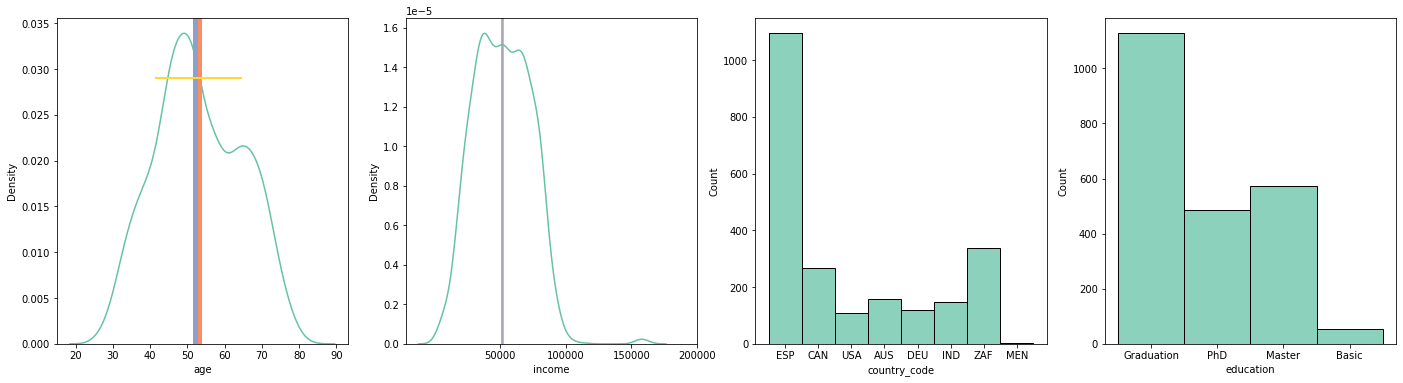

count    2240.000000
mean       53.096875
std        11.694144
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64

0    46.0
Name: age, dtype: float64

In [70]:
# Calculate location for income
mean_income = df.income.mean()
median_income = df.income.median()
mode_income = df.income.mode()

# Plot subplots
fig, ax = plt.subplots(1,4,figsize=(24,6))

# Plot different plots to illustrate statistical measures
sns.kdeplot(data=df, x="age", ax=ax[0])
sns.kdeplot(data=df, x="income", ax=ax[1])
sns.histplot(df, x="country_code", ax=ax[2])
sns.histplot(df, x="education", ax=ax[3])

# Plot mean and median for income
ax[0].axvline(df.age.mean(),c=set2_orange, linewidth=5)
ax[0].axvline(df.age.median(),c=set2_blue, linewidth=5)
ax[0].hlines(y=.029, xmin=df.age.mean()-11.69, xmax=df.age.mean()+11.69, linewidth=2, color=set2_yellow)

ax[1].axvline(mean_income, c=set2_orange)
ax[1].axvline(median_income, c=set2_blue)

# Adjust x-ticks texts
ax[1].set_xticks([50000,100000,150000,200000])

plt.show()

display(df.age.describe())
df.age.mode()

### Correlation Matrix

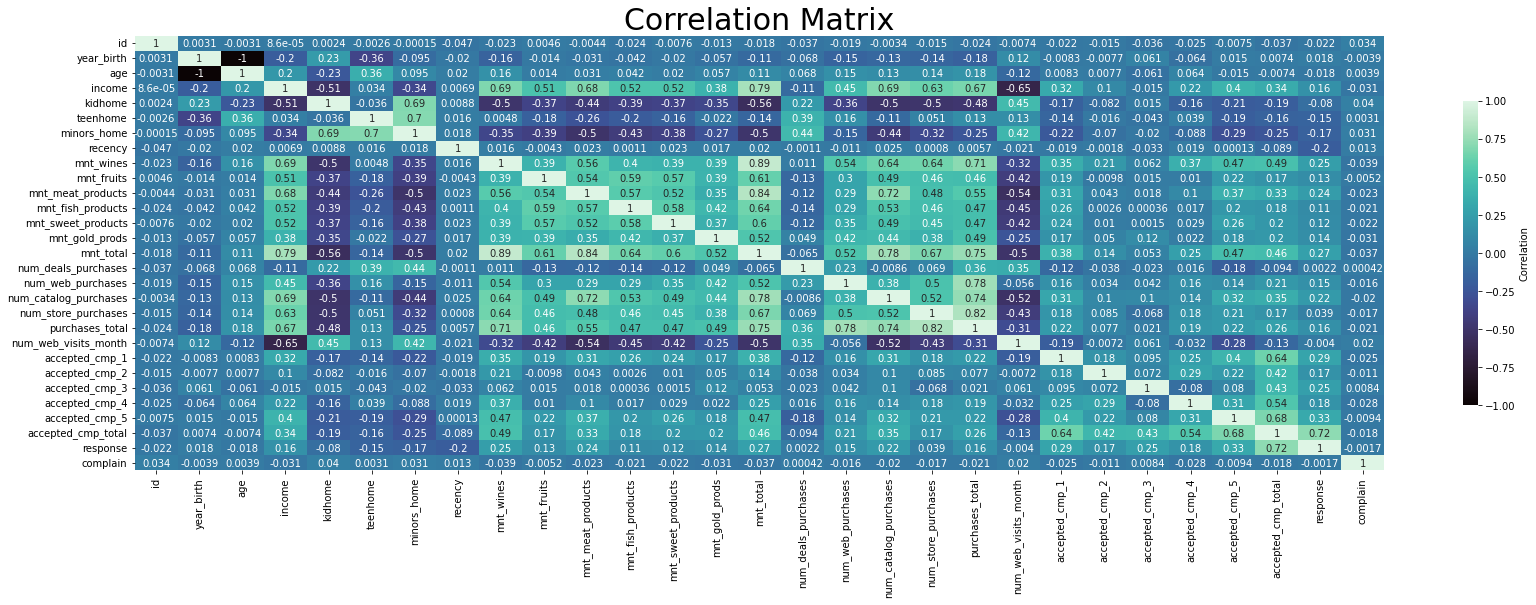

In [32]:
plt.figure(figsize=(28,8))
ax = sns.heatmap(df.corr(),annot=True,cmap='mako',cbar_kws={"shrink": .7, "label": "Correlation"}) # create heatmap
ax.set_title("Correlation Matrix", fontsize=30) # Set Title and increase font size
plt.show()

**What are takeaways from the correlation matrix above?**

- Overall consumption of products are positively correlated with `income`
- Catalog, Store, and Total Purchases are positevly correlated with `income`
- Number of dependants, kids, and teens are negatively correlated with `mnt_total` & `purchases_total`
    - kids show significantly more correlation than teens
- `num_deals_purchased` is positively correlated with the amount of minors in a home
- `num_web_visits_month` is not correlated with `num_web_purchases` which is suprising
    - instead `num_web_visits_month` is correlated with `num_deals_purchased`

#### Product consumption correlation to `income`

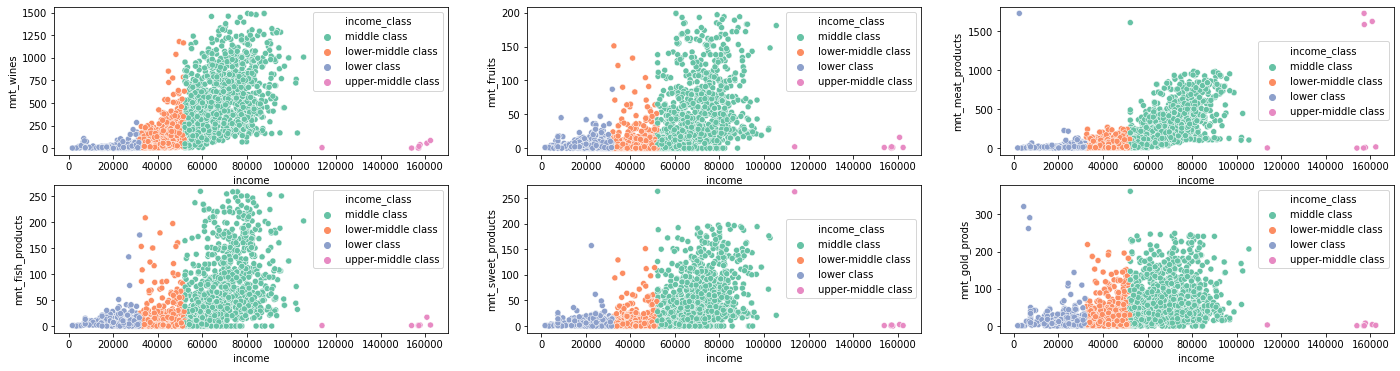

In [33]:
fig, ax = plt.subplots(2,3,figsize=(24,6)) # Create subplots

# Create plots for individual products consumed
sns.scatterplot(data=df, x="income", y="mnt_wines", hue="income_class", ax=ax[0,0])
sns.scatterplot(data=df, x="income", y="mnt_fruits", hue="income_class", ax=ax[0,1])
sns.scatterplot(data=df, x="income", y="mnt_meat_products", hue="income_class", ax=ax[0,2])
sns.scatterplot(data=df, x="income", y="mnt_fish_products", hue="income_class", ax=ax[1,0])
sns.scatterplot(data=df, x="income", y="mnt_sweet_products", hue="income_class", ax=ax[1,1])
sns.scatterplot(data=df, x="income", y="mnt_gold_prods", hue="income_class", ax=ax[1,2])

# Create plotly plot for total products consumed
fig = px.scatter(df, x="income", y="mnt_total",color="income_class", color_continuous_scale='Agsunset_r', 
    trendline="lowess",trendline_scope="overall", trendline_color_override="black",
    title="Amount of (total) products consumed per annual income")

fig.update_xaxes(showgrid=False, zeroline=True)
fig.update_yaxes(showgrid=False, zeroline=True)
fig.update_layout(legend=dict(yanchor="top",y=1.1))

As displayed before, `income` is correlated to the amount of products people consume.

#### Negative impact of `minors_home`

In [34]:
df.columns

Index(['id', 'year_birth', 'age', 'education', 'marital_status', 'income',
       'income_class', 'kidhome', 'teenhome', 'minors_home', 'dt_customer',
       'recency', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products',
       'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_prods',
       'mnt_total', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'purchases_total',
       'num_web_visits_month', 'accepted_cmp_1', 'accepted_cmp_2',
       'accepted_cmp_3', 'accepted_cmp_4', 'accepted_cmp_5',
       'accepted_cmp_total', 'response', 'complain', 'country',
       'country_code'],
      dtype='object')

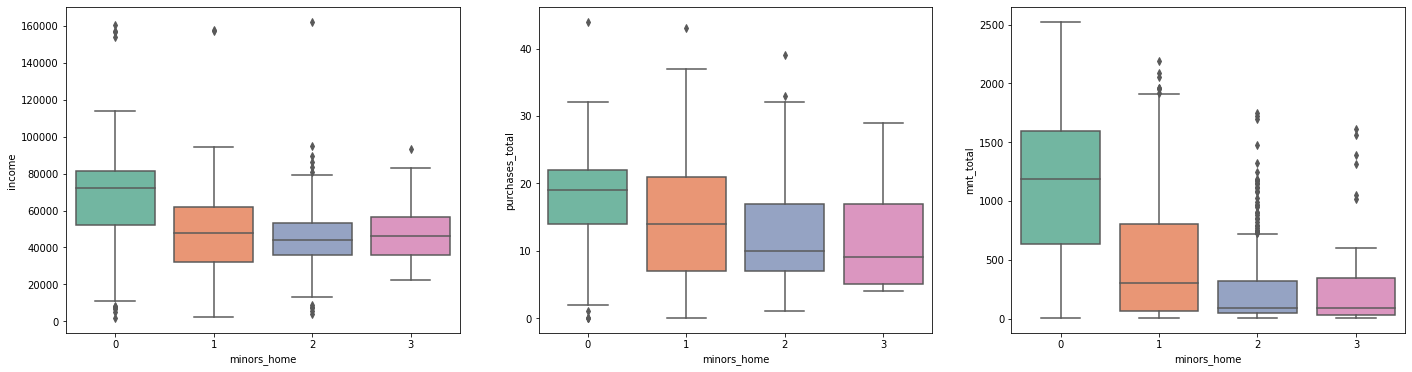

In [35]:
fig, ax = plt.subplots(1,3, figsize=(24,6))

sns.boxplot(data=df, x="minors_home", y="income", ax=ax[0])
sns.boxplot(data=df, x="minors_home", y="purchases_total", ax=ax[1])
sns.boxplot(data=df, x="minors_home", y="mnt_total", ax=ax[2])


plt.show()

In [36]:
df.columns

Index(['id', 'year_birth', 'age', 'education', 'marital_status', 'income',
       'income_class', 'kidhome', 'teenhome', 'minors_home', 'dt_customer',
       'recency', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products',
       'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_prods',
       'mnt_total', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'purchases_total',
       'num_web_visits_month', 'accepted_cmp_1', 'accepted_cmp_2',
       'accepted_cmp_3', 'accepted_cmp_4', 'accepted_cmp_5',
       'accepted_cmp_total', 'response', 'complain', 'country',
       'country_code'],
      dtype='object')

### What does the average customer look like?

In [37]:
import plotly.graph_objects as go

# Create averages for features
mean_income = round(df.income.mean(),0)
mean_age = round(df.age.mean(),0)
mean_minors_home = round(df.minors_home.mean(),2)
mean_mnt_total = round(df.mnt_total.mean(),0)
mean_dt_customer = df.dt_customer.mean().year

# Plot Table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Feature', 'Value']),
    cells=dict(values=[
        ["Income", "Age", "Minors at home", "Amoun Total Spent", "Year becoming"],
        [mean_income,mean_age,mean_minors_home,mean_mnt_total,mean_dt_customer]]))])

fig.update_layout(width=500, height=350)

fig.show()

### What is the most successful marketing campaign?

In [38]:
df.head()

,id,year_birth,age,education,marital_status,income,income_class,kidhome,teenhome,minors_home,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,mnt_total,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,purchases_total,num_web_visits_month,accepted_cmp_1,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_total,response,complain,country,country_code
0,1826,1970.0,52.0,Graduation,Divorced,84835.0,middle class,0,0,0,2014-06-16,0,189,104,379,111,189,218,1190,1,4,4,6,15,1,0,0,0,0,0,1,1,0,Spain,ESP
1,1,1961.0,61.0,Graduation,Single,57091.0,middle class,0,0,0,2014-06-15,0,464,5,64,7,0,37,577,1,7,3,7,18,5,0,1,0,0,0,2,1,0,Canada,CAN
2,10476,1958.0,64.0,Graduation,Married,67267.0,middle class,0,1,1,2014-05-13,0,134,11,59,15,2,30,251,1,3,2,5,11,2,0,0,0,0,0,0,0,0,USA,USA
3,1386,1967.0,55.0,Graduation,Cohabitation,32474.0,lower-middle class,1,1,2,2014-05-11,0,10,0,1,0,0,0,11,1,1,0,2,4,7,0,0,0,0,0,0,0,0,Australia,AUS
4,5371,1989.0,33.0,Graduation,Single,21474.0,lower class,1,0,1,2014-04-08,0,6,16,24,11,0,34,91,2,3,1,2,8,7,0,0,1,0,0,2,1,0,Spain,ESP


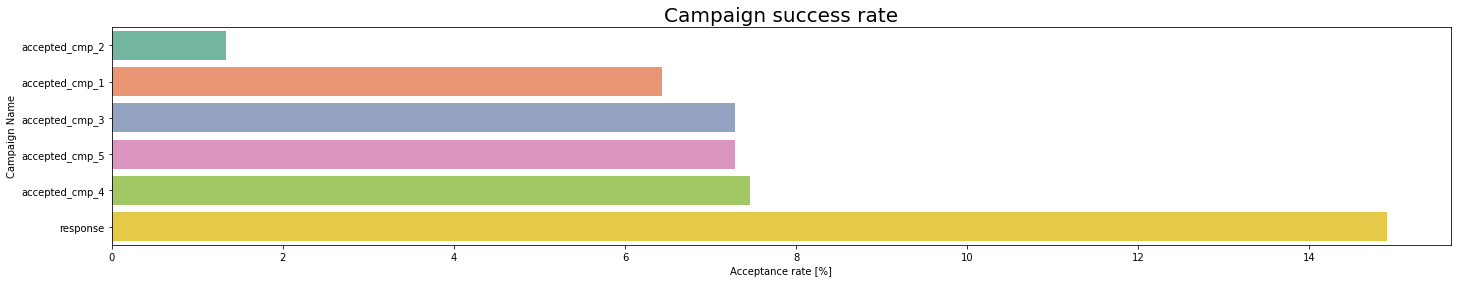

In [39]:
# Create list with all campaigns
mask = ['accepted_cmp_1', 'accepted_cmp_2', 'accepted_cmp_3', 'accepted_cmp_4','accepted_cmp_5', 'response']

# Create dataframe with success rate percentages
success_cmp = pd.DataFrame(round(df[mask].mean()*100,2).sort_values(),columns=['Percent']).reset_index()

# Plot data
plt.figure(figsize=(24,4))
sns.barplot(x='Percent', y='index', data=success_cmp)
plt.xlabel('Acceptance rate [%]')
plt.ylabel('Campaign Name')
plt.title('Campaign success rate', size=20)
plt.show()

The graphic above shows that the most recent campaign `response` is the most successful of all campaigns. Campaign 2 happens to have the worst performance (10 times worst).

In [40]:
df.head()

,id,year_birth,age,education,marital_status,income,income_class,kidhome,teenhome,minors_home,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,mnt_total,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,purchases_total,num_web_visits_month,accepted_cmp_1,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_total,response,complain,country,country_code
0,1826,1970.0,52.0,Graduation,Divorced,84835.0,middle class,0,0,0,2014-06-16,0,189,104,379,111,189,218,1190,1,4,4,6,15,1,0,0,0,0,0,1,1,0,Spain,ESP
1,1,1961.0,61.0,Graduation,Single,57091.0,middle class,0,0,0,2014-06-15,0,464,5,64,7,0,37,577,1,7,3,7,18,5,0,1,0,0,0,2,1,0,Canada,CAN
2,10476,1958.0,64.0,Graduation,Married,67267.0,middle class,0,1,1,2014-05-13,0,134,11,59,15,2,30,251,1,3,2,5,11,2,0,0,0,0,0,0,0,0,USA,USA
3,1386,1967.0,55.0,Graduation,Cohabitation,32474.0,lower-middle class,1,1,2,2014-05-11,0,10,0,1,0,0,0,11,1,1,0,2,4,7,0,0,0,0,0,0,0,0,Australia,AUS
4,5371,1989.0,33.0,Graduation,Single,21474.0,lower class,1,0,1,2014-04-08,0,6,16,24,11,0,34,91,2,3,1,2,8,7,0,0,1,0,0,2,1,0,Spain,ESP


### What are the most succesful products?

count    2240.000000
mean        0.446875
std         0.890543
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: accepted_cmp_total, dtype: float64

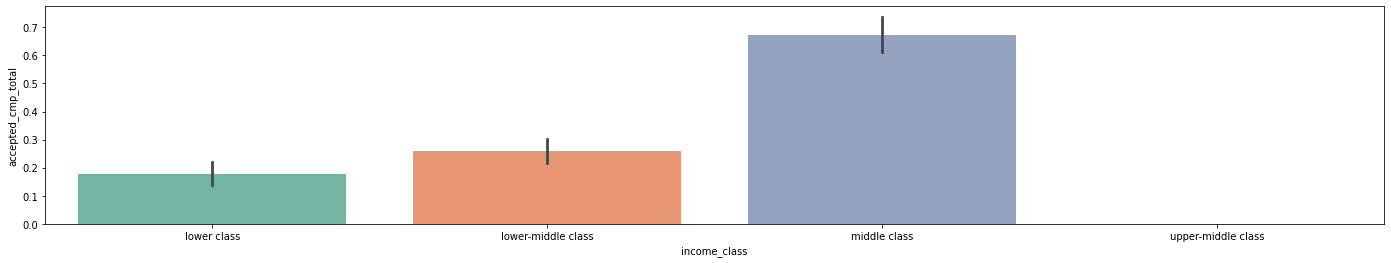

In [41]:
plt.figure(figsize=(24,4))
sns.barplot(data=df, x="income_class",y="accepted_cmp_total", order=['lower class', 'lower-middle class', 'middle class', 'upper-middle class'])

df.accepted_cmp_total.describe()

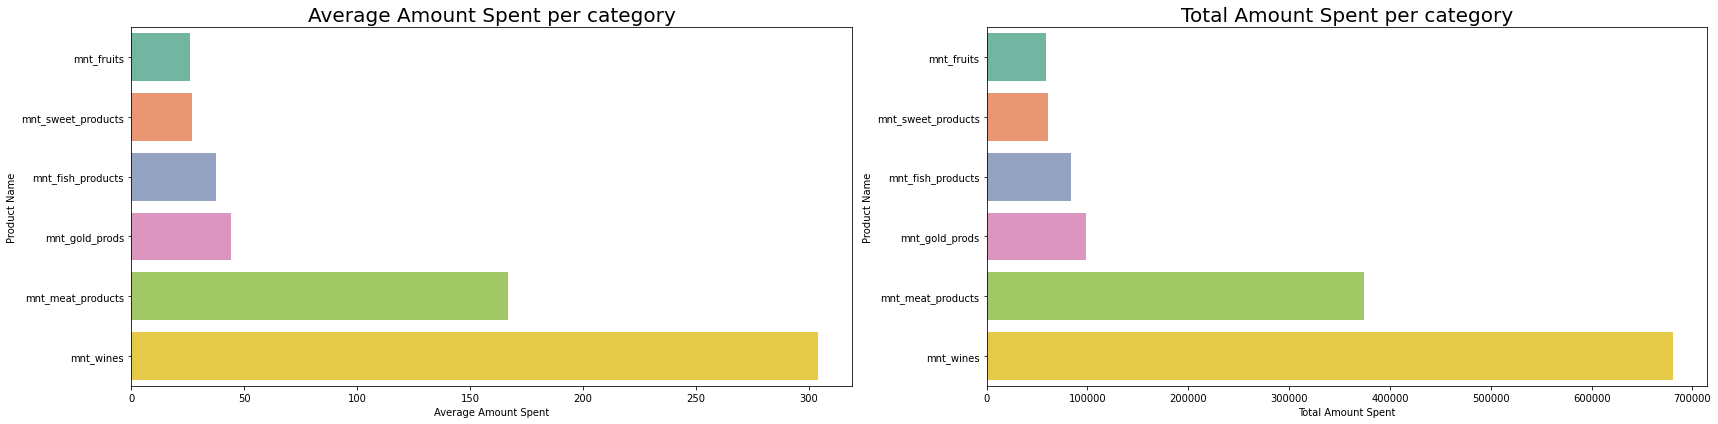

In [42]:
# Create list with all campaigns
mask = ['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products','mnt_sweet_products', 'mnt_gold_prods']

# Create dataframe with success rate percentages
best_product_average = pd.DataFrame(round(df[mask].mean(),2).sort_values(),columns=['Average']).reset_index()
best_product_total = pd.DataFrame(round(df[mask].sum(),2).sort_values(),columns=['Spent']).reset_index()

# Plot data for Total Spent
fig, ax = plt.subplots(1,2, figsize=(24,6))
sns.barplot(x='Average', y='index', data=best_product_average,ax=ax[0])
ax[0].set_xlabel('Average Amount Spent')
ax[0].set_ylabel('Product Name')
ax[0].set_title('Average Amount Spent per category', size=20)

# Plot data for average customer spent per customer
sns.barplot(x='Spent', y='index', data=best_product_total,ax=ax[1])
ax[1].set_xlabel('Total Amount Spent')
ax[1].set_ylabel('Product Name')
ax[1].set_title('Total Amount Spent per category', size=20)

fig.tight_layout() # Format subplots to display everything neatly
plt.show()

### Who purchases deals?

In [43]:
df.head(1)

,id,year_birth,age,education,marital_status,income,income_class,kidhome,teenhome,minors_home,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,mnt_total,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,purchases_total,num_web_visits_month,accepted_cmp_1,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_total,response,complain,country,country_code
0,1826,1970.0,52.0,Graduation,Divorced,84835.0,middle class,0,0,0,2014-06-16,0,189,104,379,111,189,218,1190,1,4,4,6,15,1,0,0,0,0,0,1,1,0,Spain,ESP


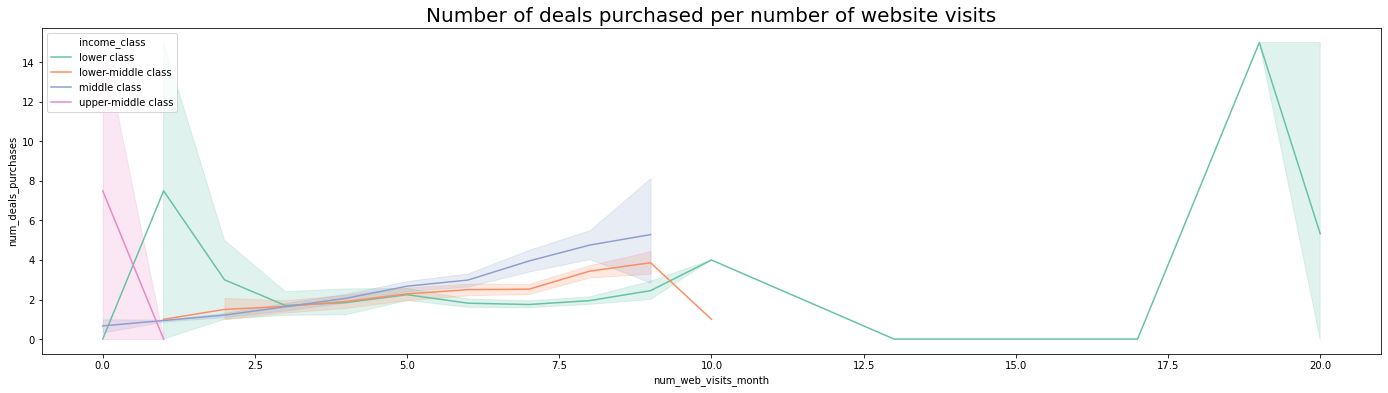

In [44]:
plt.figure(figsize=(24,6))
sns.lineplot(data=df, x="num_web_visits_month",y='num_deals_purchases',hue="income_class",
    hue_order=['lower class','lower-middle class','middle class','upper-middle class'])

plt.title('Number of deals purchased per number of website visits',fontsize=20)
plt.show()

This graph is extremely interesting as it shows that the higher the income the less times a website is visited. Additionally, it shows that it takes low income classes longer to make a purchase decision compared to higher income classes. After 17 website visits, the 

In [45]:
df["num_deals_purchases_per_num_web_visits_per_month"] = round(df.num_deals_purchases / df.num_web_visits_month,2)

In [46]:
df.head()

,id,year_birth,age,education,marital_status,income,income_class,kidhome,teenhome,minors_home,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,mnt_total,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,purchases_total,num_web_visits_month,accepted_cmp_1,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_total,response,complain,country,country_code,num_deals_purchases_per_num_web_visits_per_month
0,1826,1970.0,52.0,Graduation,Divorced,84835.0,middle class,0,0,0,2014-06-16,0,189,104,379,111,189,218,1190,1,4,4,6,15,1,0,0,0,0,0,1,1,0,Spain,ESP,1.00
1,1,1961.0,61.0,Graduation,Single,57091.0,middle class,0,0,0,2014-06-15,0,464,5,64,7,0,37,577,1,7,3,7,18,5,0,1,0,0,0,2,1,0,Canada,CAN,0.20
2,10476,1958.0,64.0,Graduation,Married,67267.0,middle class,0,1,1,2014-05-13,0,134,11,59,15,2,30,251,1,3,2,5,11,2,0,0,0,0,0,0,0,0,USA,USA,0.50
3,1386,1967.0,55.0,Graduation,Cohabitation,32474.0,lower-middle class,1,1,2,2014-05-11,0,10,0,1,0,0,0,11,1,1,0,2,4,7,0,0,0,0,0,0,0,0,Australia,AUS,0.14
4,5371,1989.0,33.0,Graduation,Single,21474.0,lower class,1,0,1,2014-04-08,0,6,16,24,11,0,34,91,2,3,1,2,8,7,0,0,1,0,0,2,1,0,Spain,ESP,0.29


### What are characteristics of people who have seen the campaigns

In [47]:
# Create Pivot table to see accummulated behavior and characteristics amongst customers who have seen any campaign
pivot = df.pivot_table(df, index="accepted_cmp_total")
pivot

,accepted_cmp_1,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,age,complain,id,income,kidhome,minors_home,mnt_fish_products,mnt_fruits,mnt_gold_prods,mnt_meat_products,mnt_sweet_products,mnt_total,mnt_wines,num_catalog_purchases,num_deals_purchases,num_deals_purchases_per_num_web_visits_per_month,num_store_purchases,num_web_purchases,num_web_visits_month,purchases_total,recency,response,teenhome,year_birth
accepted_cmp_total,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,52.875536,0.011036,5660.566524,48343.913108,0.499693,1.048437,32.071735,22.738811,37.925812,125.755365,22.914163,458.109135,216.703250,2.114654,2.364807,NaN,5.483752,3.719804,5.421827,13.683017,50.895156,0.000000,0.548743,1969.124464
1,0.105405,0.000000,0.200000,0.197297,0.102703,54.637838,0.002703,5477.240541,56811.006085,0.356757,0.818919,46.386486,31.535135,55.943243,235.805405,32.797297,830.097297,427.629730,3.513514,2.459459,0.497317,6.345946,4.870270,5.386486,17.189189,45.697297,0.394595,0.462162,1967.362162
2,0.218310,0.056338,0.450704,0.253521,0.309859,53.330986,0.007042,5219.098592,61460.195451,0.295775,0.640845,50.359155,35.373239,55.823944,288.492958,37.767606,1066.591549,598.774648,4.253521,2.239437,0.470704,6.429577,5.133803,5.063380,18.056338,40.464789,0.711268,0.345070,1968.669014
3,0.627451,0.098039,0.196078,0.529412,0.725490,50.137255,0.019608,5897.019608,78462.352941,0.058824,0.313725,88.392157,51.764706,86.509804,385.803922,57.490196,1486.921569,816.960784,5.921569,1.529412,0.511176,7.764706,5.784314,3.607843,21.000000,42.921569,0.823529,0.254902,1971.862745
4,0.888889,0.194444,0.333333,0.666667,0.944444,50.277778,0.000000,5004.000000,82143.277778,0.083333,0.194444,68.027778,58.305556,86.722222,481.916667,62.138889,1673.527778,916.416667,6.638889,1.055556,0.303889,8.027778,5.638889,3.666667,21.361111,47.388889,0.972222,0.111111,1971.722222
5,1.000000,1.000000,0.300000,0.700000,1.000000,54.100000,0.000000,4547.100000,86434.400000,0.000000,0.200000,47.700000,40.000000,59.200000,362.200000,58.100000,1514.000000,946.800000,6.900000,0.700000,0.326000,8.000000,5.400000,3.800000,21.000000,44.600000,1.000000,0.200000,1967.900000


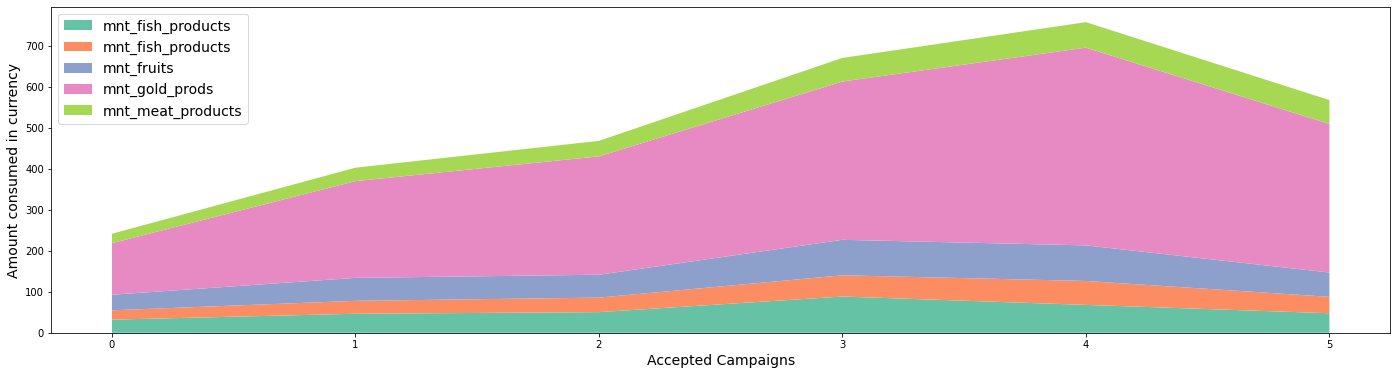

In [48]:
plt.figure(figsize=(24,6)) #Plot shape

# Plot all campaigns and amount consumed of each product
plt.stackplot(pivot.index,pivot.mnt_fish_products, pivot.mnt_fruits, 
    pivot.mnt_gold_prods, pivot.mnt_meat_products, pivot.mnt_sweet_products,
    labels=['mnt_fish_products','mnt_fish_products','mnt_fruits','mnt_gold_prods','mnt_meat_products','mnt_sweet_products'])

# Refine plot
plt.xlabel("Accepted Campaigns",fontsize=14)
plt.ylabel("Amount consumed in currency",fontsize=14)
plt.legend(loc="upper left",fontsize=14)
plt.show()

It appears that the optimal amount of campaigns is 4 as most people convert at that point. Let's see who were targeted in each step of the campaign process.

In [49]:
df.head()

,id,year_birth,age,education,marital_status,income,income_class,kidhome,teenhome,minors_home,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,mnt_total,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,purchases_total,num_web_visits_month,accepted_cmp_1,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_total,response,complain,country,country_code,num_deals_purchases_per_num_web_visits_per_month
0,1826,1970.0,52.0,Graduation,Divorced,84835.0,middle class,0,0,0,2014-06-16,0,189,104,379,111,189,218,1190,1,4,4,6,15,1,0,0,0,0,0,1,1,0,Spain,ESP,1.00
1,1,1961.0,61.0,Graduation,Single,57091.0,middle class,0,0,0,2014-06-15,0,464,5,64,7,0,37,577,1,7,3,7,18,5,0,1,0,0,0,2,1,0,Canada,CAN,0.20
2,10476,1958.0,64.0,Graduation,Married,67267.0,middle class,0,1,1,2014-05-13,0,134,11,59,15,2,30,251,1,3,2,5,11,2,0,0,0,0,0,0,0,0,USA,USA,0.50
3,1386,1967.0,55.0,Graduation,Cohabitation,32474.0,lower-middle class,1,1,2,2014-05-11,0,10,0,1,0,0,0,11,1,1,0,2,4,7,0,0,0,0,0,0,0,0,Australia,AUS,0.14
4,5371,1989.0,33.0,Graduation,Single,21474.0,lower class,1,0,1,2014-04-08,0,6,16,24,11,0,34,91,2,3,1,2,8,7,0,0,1,0,0,2,1,0,Spain,ESP,0.29


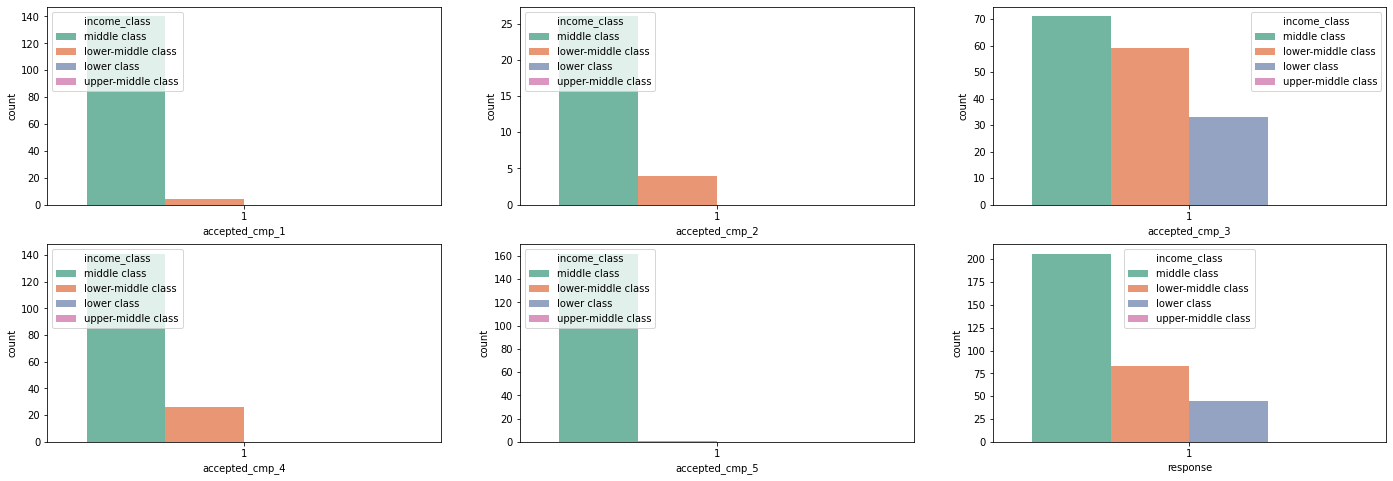

In [50]:
fig,ax = plt.subplots(2,3,figsize=(24,8)) #Plot shape


sns.countplot(x=df.accepted_cmp_1[df.accepted_cmp_1==1],data=df,hue="income_class",ax=ax[0,0])
sns.countplot(x=df.accepted_cmp_2[df.accepted_cmp_2==1],data=df,hue="income_class",ax=ax[0,1])
sns.countplot(x=df.accepted_cmp_3[df.accepted_cmp_3==1],data=df,hue="income_class",ax=ax[0,2])
sns.countplot(x=df.accepted_cmp_4[df.accepted_cmp_4==1],data=df,hue="income_class",ax=ax[1,0])
sns.countplot(x=df.accepted_cmp_5[df.accepted_cmp_5==1],data=df,hue="income_class",ax=ax[1,1])
sns.countplot(x=df.response[df.response==1],data=df,hue="income_class",ax=ax[1,2])

plt.show()